In [1]:
using Plots; pyplot()

Plots.PyPlotBackend()

In [2]:
include("voronoi.jl")

getVoronoiDiagram (generic function with 1 method)

  0.000340 seconds (397 allocations: 15.969 KiB)
vertices: 13
halfedges: 26
faces: 10


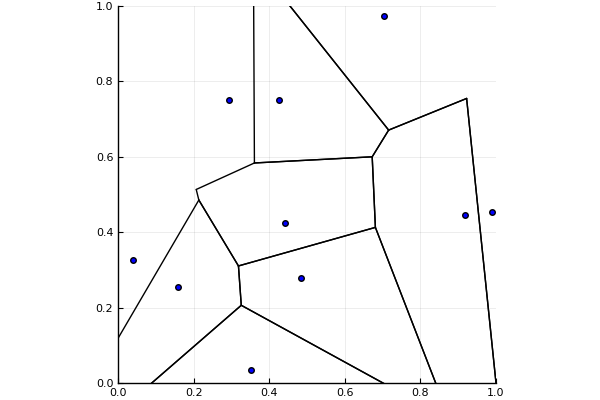

In [7]:
sites = [(rand(), rand()) for i = 1:10];
@time voronoi = getVoronoiDiagram(sites);

println("vertices: ",length(voronoi.vertices))
println("halfedges: ", length(voronoi.halfedges))
println("faces: ", length(voronoi.faces))

plot()
for face in voronoi.faces
    scatter!(face.site, color="blue")
    
    halfedge = face.outerComponent
    
    while halfedge != nothing && halfedge.next != nothing
        p0 = halfedge.origin
        p1 = halfedge.next.origin

        if p0 != nothing && p1 != nothing
            plot!([p0.coordinates, p1.coordinates], color="black")
        end
        halfedge = halfedge.next

        if halfedge == face.outerComponent
            break
        end
    end
end
plot!(xlims=(0,1), ylims=(0,1), aspect_ratio=:equal, legend=false)